<a href="https://colab.research.google.com/github/Navneet0903/student-data/blob/main/student_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 Student Performance Analytics Dashboard

**Author:** Navneet Raj

This notebook analyzes student performance data to identify trends and flag students at risk of academic failure or dropout.

In [17]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set(style="whitegrid")
%matplotlib inline


In [18]:
# Load dataset
df = pd.read_csv('student_data.csv')
df.head()

,Student_ID,Name,Marks,Attendance(%),Login_Frequency
0,S001,Student_1,72.45,65.85,14
1,S002,Student_2,62.93,75.79,12
2,S003,Student_3,74.72,76.57,9
3,S004,Student_4,87.85,71.98,10
4,S005,Student_5,61.49,78.39,13


In [19]:

# Summary statistics
df.describe()


,Marks,Attendance(%),Login_Frequency
count,100.000000,100.00000,100.000000
mean,63.442200,80.08590,9.960000
std,13.622572,9.20151,3.360255
min,25.700000,60.81000,1.000000
25%,55.985000,71.94500,8.750000
50%,63.100000,80.84500,10.000000
75%,71.092500,85.38250,12.000000
max,92.780000,100.00000,18.000000


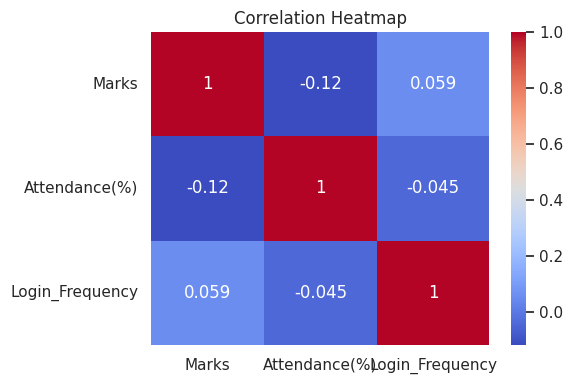

In [20]:

# Correlation heatmap
plt.figure(figsize=(6, 4))
corr = df[["Marks", "Attendance(%)", "Login_Frequency"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


/tmp/ipython-input-21-4013134547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Marks", y="Name", data=top_students, palette="Greens_d")


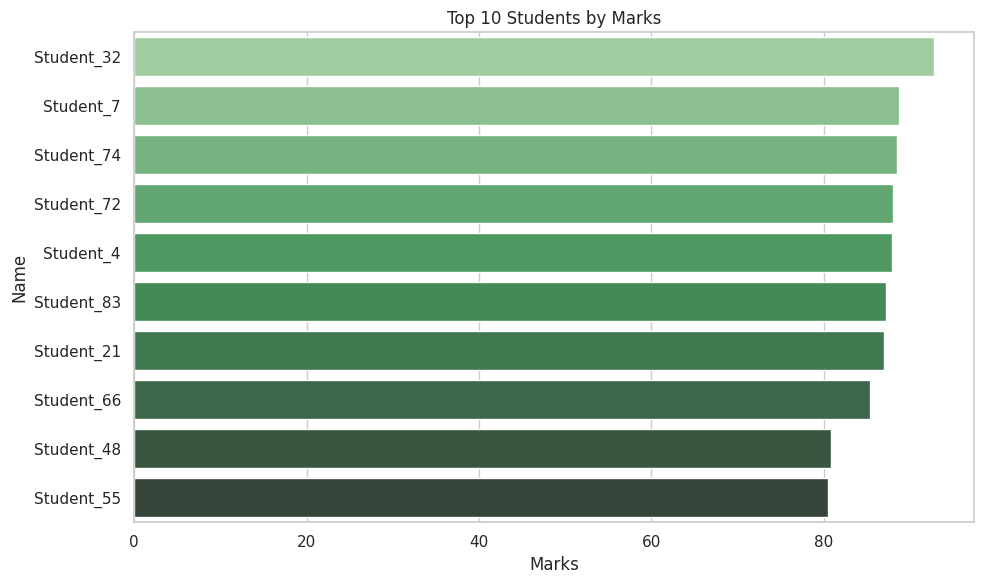

In [21]:

# Top 10 students by marks
top_students = df.sort_values(by="Marks", ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x="Marks", y="Name", data=top_students, palette="Greens_d")
plt.title("Top 10 Students by Marks")
plt.tight_layout()
plt.show()


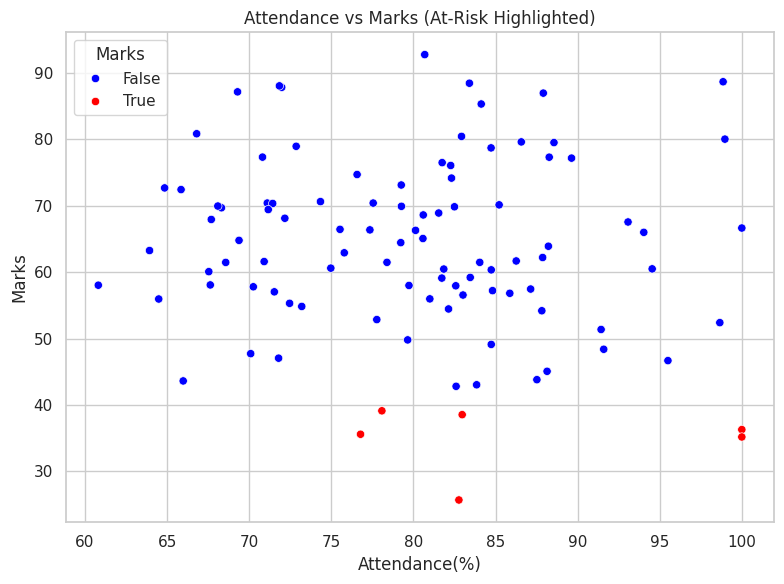

In [22]:

# Scatter plot Attendance vs Marks
plt.figure(figsize=(8,6))
sns.scatterplot(x="Attendance(%)", y="Marks", data=df, hue=(df["Marks"] < 40), palette={True: "red", False: "blue"})
plt.title("Attendance vs Marks (At-Risk Highlighted)")
plt.tight_layout()
plt.show()


In [23]:

# Identify at-risk students
at_risk = df[(df["Marks"] < 40) | (df["Attendance(%)"] < 60) | (df["Login_Frequency"] < 3)]
at_risk.sort_values(by="Marks")


,Student_ID,Name,Marks,Attendance(%),Login_Frequency
74,S075,Student_75,25.70,82.77,9
79,S080,Student_80,35.19,100.00,11
37,S038,Student_38,35.60,76.78,9
13,S014,Student_14,36.30,100.00,13
49,S050,Student_50,38.55,82.97,14
14,S015,Student_15,39.13,78.08,11
10,S011,Student_11,58.05,60.81,1
